In [1]:
#pip install keras

In [2]:
#pip install tensorflow

In [3]:
#pip install opencv-python

In [4]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [8]:
tensorflow.config.list_physical_devices('GPU')

[]

In [9]:
labels = os.listdir("train")

In [10]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

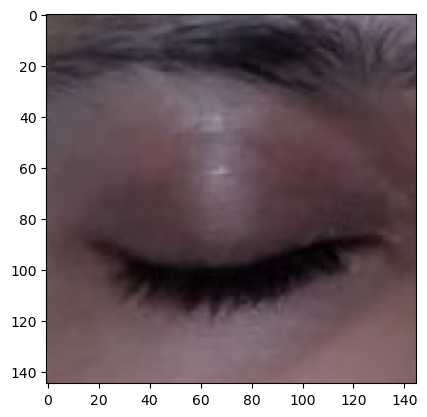

In [11]:

plt.imshow(plt.imread("train\Closed\_0.jpg"))

In [12]:
a = plt.imread("train\Closed\_0.jpg")
a

array([[[ 93,  77,  77],
        [ 91,  75,  75],
        [ 88,  72,  72],
        ...,
        [136, 123, 140],
        [130, 117, 134],
        [131, 119, 133]],

       [[ 94,  80,  79],
        [ 94,  78,  78],
        [ 91,  75,  75],
        ...,
        [122, 109, 126],
        [121, 108, 125],
        [121, 109, 123]],

       [[ 94,  80,  79],
        [ 94,  80,  79],
        [ 93,  77,  77],
        ...,
        [116, 103, 120],
        [112,  99, 116],
        [116, 104, 118]],

       ...,

       [[121,  92,  96],
        [121,  92,  96],
        [120,  91,  95],
        ...,
        [131, 101, 101],
        [132, 102, 102],
        [131, 101, 101]],

       [[121,  92,  96],
        [121,  92,  96],
        [122,  93,  97],
        ...,
        [132, 102, 102],
        [132, 102, 102],
        [129,  99,  99]],

       [[121,  92,  97],
        [120,  91,  96],
        [122,  93,  98],
        ...,
        [131, 103,  99],
        [130, 102,  98],
        [128, 100,  97]]

In [13]:
a.shape

(145, 145, 3)

In [14]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.2,
                                    shear_range=0.2, 
                                    zoom_range=0.2, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2, 
                                    validation_split= 0.2)

In [15]:
train_data_gen

In [16]:
train_data = train_data_gen.flow_from_directory('train',
                                                target_size=(80,80),
                                                batch_size=8,
                                                class_mode='categorical',
                                                subset='training')

Found 2321 images belonging to 4 classes.


In [17]:
validation_data = train_data_gen.flow_from_directory('train',
                                                     target_size=(80,80), 
                                                     batch_size=8, 
                                                     class_mode='categorical', 
                                                     subset= 'validation')

Found 579 images belonging to 4 classes.


In [18]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [19]:
test_data = test_data_gen.flow_from_directory('train',
                                              target_size=(80,80),
                                              batch_size=8,
                                              class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [20]:
train_data

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [22]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [24]:
history = model.fit(train_data, epochs=5, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/5
291/291 [==============================] - 64s 216ms/step - loss: 0.8997 - accuracy: 0.5502 - val_loss: 0.4831 - val_accuracy: 0.7486
Epoch 2/5
291/291 [==============================] - 62s 213ms/step - loss: 0.5647 - accuracy: 0.7040 - val_loss: 0.4686 - val_accuracy: 0.7583
Epoch 3/5
291/291 [==============================] - 62s 213ms/step - loss: 0.5017 - accuracy: 0.7376 - val_loss: 0.4149 - val_accuracy: 0.7403
Epoch 4/5
291/291 [==============================] - 62s 212ms/step - loss: 0.4449 - accuracy: 0.7656 - val_loss: 0.3834 - val_accuracy: 0.7993
Epoch 5/5
291/291 [==============================] - 62s 213ms/step - loss: 0.4433 - accuracy: 0.7622 - val_loss: 0.3540 - val_accuracy: 0.8152


In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

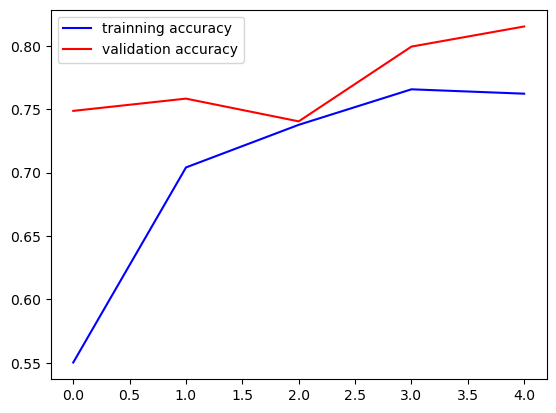

In [26]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

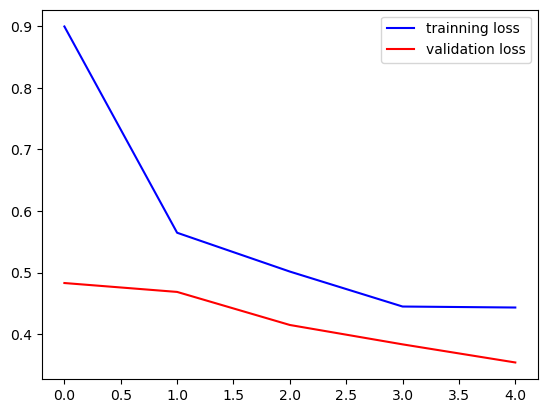

In [27]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [28]:
model.save("drowiness.h5")

In [29]:
model.save("drowiness.model")

INFO:tensorflow:Assets written to: drowiness.model\assets


INFO:tensorflow:Assets written to: drowiness.model\assets
